In [174]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [175]:
file_data = pd.read_csv('housing.data', header=None)

In [176]:
file_data.head()

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [177]:
# 特征截取
data = np.empty((len(file_data), 14))
for i, d in enumerate(file_data.values):
    d = map(float, filter(lambda s: s != '', d[0].split(' ')))
    data[i] = d

In [178]:
x, y = np.split(data, (13, ), axis=1)

In [179]:
print u'样本个数: %d, 特征个数: %d' % x.shape
print y.shape
y = y.ravel()
print y.shape

样本个数: 506, 特征个数: 13
(506L, 1L)
(506L,)


## 划分训练集/测试集

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

## 建模

In [182]:
# 随机森林建模
# model = RandomForestRegressor(n_estimators=50, criterion='mse')
# model.fit(x_train, y_train.ravel())

In [183]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [184]:
# 弹性网络建模
model = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=True)),
    ('linear', ElasticNetCV(l1_ratio=[0.1,0.3,0.5,0.7,0.99,1.0], \
                           alphas=np.logspace(-3,2,5), fit_intercept=False, \
                         max_iter=1e3, cv=3))
])
model.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linear', ElasticNetCV(alphas=array([  1.00000e-03,   1.77828e-02,   3.16228e-01,   5.62341e+00,
         1.00000e+02]),
       copy_X=True, cv...se,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0))])

In [185]:
# 测试集，按结果排序。为了后面绘图直观
order = y_test.argsort(axis=0)
y_test = y_test[order]
x_test = x_test[order, :]
print x_test.shape
y_pred = model.predict(x_test)

r2 = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print 'r2:', r2
print u'均方误差:', mse

(152L, 13L)
r2: 0.806333520611
均方误差: 16.1257365581


## 绘图

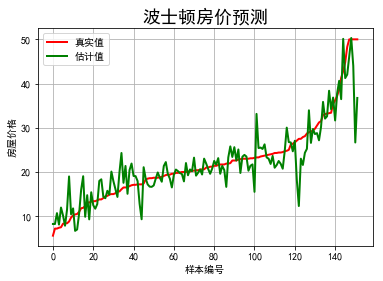

In [186]:
mpl.rcParams['font.sans-serif'] = [u'simHei']

t = np.arange(len(y_pred))
plt.plot(t, y_test, 'r-', lw=2, label=u'真实值')
plt.plot(t, y_pred, 'g-', lw=2, label=u'估计值')
plt.legend(loc='best')
plt.title(u'波士顿房价预测', fontsize=18)
plt.xlabel(u'样本编号')
plt.ylabel(u'房屋价格')
plt.grid()
plt.show()